<a href="https://colab.research.google.com/github/leoserpa/leoserpa/blob/main/regress%C3%A3o_linear_simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importando os pacotes necessários
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

# configurar notebook
sns.set_style()

# importar os arquivos 
df = pd.read_csv("train.csv")

# ver as primeiras entradas 
df.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


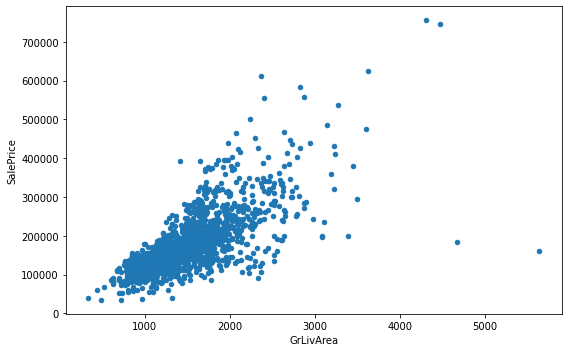

In [2]:
# plotar gráfico de dispersão
fig, ax = plt.subplots(figsize = (8,5))
df.plot.scatter(x= 'GrLivArea', y='SalePrice', ax=ax)
plt.tight_layout();

In [3]:
# importar o scikir-learn para criar o modelo
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error

In [4]:
# determinar  x e y
X = df['GrLivArea'].values.reshape(-1,1)
Y = df['SalePrice']

# dividir o dataset entre treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# criar e treinar um modelo de Regressão Linear 
rls_model = LinearRegression()
rls_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
# imprimir os coeficientes
print("Coeficiente:\t", rls_model.coef_)
print("Intercepto:\t", rls_model.intercept_)

Coeficiente:	 [113.06968172]
Intercepto:	 9898.732288270869


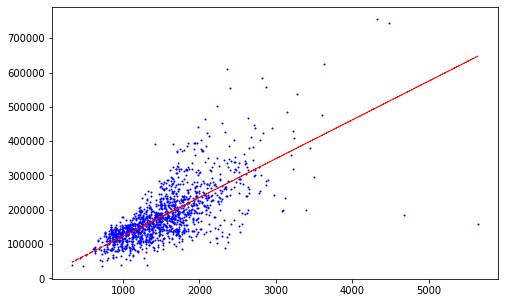

In [6]:
# plotar reta e dados
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(X, Y, s=1, color='blue')
ax.plot(X, (rls_model.coef_ * X + rls_model.intercept_),  '--r', linewidth=1);


In [7]:
# previsões em cima do dataset de teste
Y_pred = rls_model.predict(X_test)

Y_pred


array([156663.17916042, 123872.97146171, 127491.20127674, 174075.91014525,
       199177.37948702, 196124.49808059, 176337.30377964, 219642.99187828,
       148296.02271316, 201212.63375797, 226992.52119006, 194428.45285479,
       273577.23005857, 135519.14867884, 115053.53628757, 153384.15839055,
       238299.48936203, 184930.59959034, 148409.09239488, 190018.73526772,
       242822.27663081, 157793.87597761, 171588.37714742, 172719.07396461,
       200195.00662249, 136762.91517775, 141737.98117342, 399649.92517601,
       182895.34531938, 102163.59257153, 158698.43343137, 199855.79757734,
       161412.10579264, 127491.20127674, 121272.36878216, 117088.79055853,
       647837.87655071, 249267.24848884, 110756.88838223, 194428.45285479,
       205283.14229988, 168761.63510442, 157002.38820558, 183460.69372798,
       169440.05319474, 102163.59257153, 128961.1071391 , 151575.04348303,
       161864.38451952, 190810.22303976, 274481.78751233, 244292.18249317,
       137102.12422291, 1

In [8]:
# avaliar o desempenho do modelo
print("R2 Score:\t", r2_score(Y_test, Y_pred))
print('MAE:\t\t', mean_absolute_error(Y_test, Y_pred))
print('MSE:\t\t', mean_squared_error,(Y_test, Y_pred))


R2 Score:	 0.4198381345169555
MAE:		 35356.2944333505
MSE:		 <function mean_squared_error at 0x7f1f2765ec20> (1146    180000
1113    134500
342      87500
1265    183900
1365    216000
         ...  
1081    133000
216     210000
614      75500
1185    104900
1392    123000
Name: SalePrice, Length: 365, dtype: int64, array([156663.17916042, 123872.97146171, 127491.20127674, 174075.91014525,
       199177.37948702, 196124.49808059, 176337.30377964, 219642.99187828,
       148296.02271316, 201212.63375797, 226992.52119006, 194428.45285479,
       273577.23005857, 135519.14867884, 115053.53628757, 153384.15839055,
       238299.48936203, 184930.59959034, 148409.09239488, 190018.73526772,
       242822.27663081, 157793.87597761, 171588.37714742, 172719.07396461,
       200195.00662249, 136762.91517775, 141737.98117342, 399649.92517601,
       182895.34531938, 102163.59257153, 158698.43343137, 199855.79757734,
       161412.10579264, 127491.20127674, 121272.36878216, 117088.79055853,
      